In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
import pathlib
dataset_url = r"C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritisp\trainp"
data_dir = r"C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritisp\trainp"
data_dir = pathlib.Path(data_dir)

print(data_dir)

C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritisp\trainp


C:\Users\C RISHI VARDHAN REDD\Desktop\osteoathritisp\trainp\4p\9025994L.png


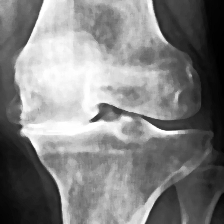

In [3]:
roses = list(data_dir.glob('4p/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))


In [4]:
img_height, img_width = 180, 180
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6078 files belonging to 5 classes.
Using 4863 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 6078 files belonging to 5 classes.
Using 1215 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['0p', '1p', '2p', '3p', '4p']


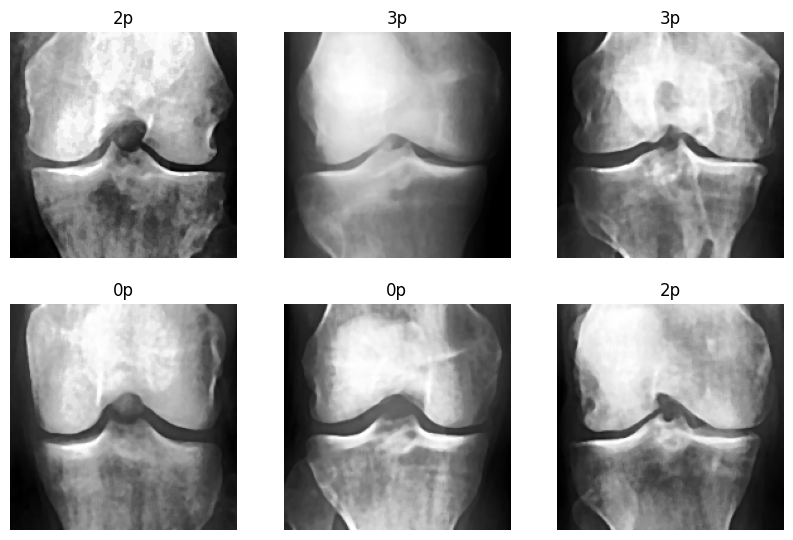

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import EfficientNetV2B0 

In [10]:
# Initialize the Sequential model
efficientnet_model = Sequential()

In [11]:
# Load EfficientNetV2 without the top layer (include_top=False)
pretrained_model = EfficientNetV2B0(include_top=False, input_shape=(img_height, img_width, 3))
pretrained_model.trainable = False

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 170s 7us/step


In [12]:
# Add the EfficientNet model to Sequential
efficientnet_model.add(pretrained_model)

In [13]:
# Add a Flatten layer
efficientnet_model.add(Flatten())

In [14]:
# Add fully connected layers
efficientnet_model.add(Dense(512, activation='relu'))
efficientnet_model.add(Dense(5, activation='softmax')) 

In [15]:
# Print the summary of the EfficientNetV2 model
efficientnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)  │ (None, 6, 6, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 46080)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    23,593,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,515,349 (112.59 MB)

 Trainable params: 23,596,037 (90.01 MB)

 Non-trainable params: 5,919,312 (22.58 MB)

In [16]:
# One-hot encode the labels
num_classes = 5

In [17]:
def one_hot_encode(image, label):
    label = tf.one_hot(label, num_classes)
    return image, label

train_ds = train_ds.map(one_hot_encode)
val_ds = val_ds.map(one_hot_encode)

In [18]:
# Compile the model
efficientnet_model.compile(
    optimizer=Adam(learning_rate=0.001),  # Adjust learning rate as needed
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [20]:
# Train the model
epochs = 40
history = efficientnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/40
  6/152 ━━━━━━━━━━━━━━━━━━━━ 1:06 458ms/step - accuracy: 0.4049 - loss: 9.4685

KeyboardInterrupt: 

In [ ]:

# Plot the training and validation accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Plot the training and validation loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()